# データセットとデータローダ

２つのプリミティブが提供されている

- torch.utils.data.DataLoader
- torch.utils.data.Dataset

データセットにはサンプルと対応するラベルが．

データローダはデータセットのイテレーションができる

In [1]:
import os

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [4]:
# 手元になかったらDownloadする
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=not os.path.exists('data/FashionMNIST/raw/train-images-idx3-ubyte.gz'),
    transform=ToTensor())

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=not os.path.exists('data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz'),
    transform=ToTensor())

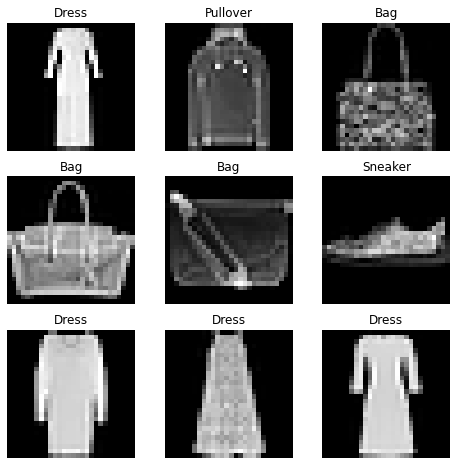

In [7]:
# とりあえず表示してみる
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [10]:
# カスタムデータセットをつくる
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    u"""
        画像が入っているディレクトリやアノテーションファイルの初期化をする
        transform関連は後述
    """
    def __init__(
        self,
        annotations_file,
        img_dir,
        transform=None,
        target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    u"""
        read_imageによりtensorに変換する
        対応したlabelをcsvファイルから得る
    """
    def __getitem__(self, idx):
        img_path = os.path.join(
            self.img_dir,
            self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [16]:
# データローダを用いた訓練データの用意
from torch.utils.data import DataLoader

# Datasetを用いてDataloaderの初期化
train_dataloader = DataLoader(
    training_data, batch_size=64, shuffle=True)

test_dataloader = DataLoader(
    test_data, batch_size=64, shuffle=True)

In [18]:
# データローダを用いたイテレーション
train_features, train_labels = next(iter(train_dataloader))

print(f'feature batch shape: {train_features.size()}')
print(f'labels batch shape: {train_labels.size()}')

img = tran_features[0].squeeze()
label = train

feature batch shape: torch.Size([64, 1, 28, 28])
labels batch shape: torch.Size([64])
